Statistical Analysis

# Import Libraries


In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset


In [7]:
import pandas as pd

# Correct the file path if necessary and ensure it points to a .csv file
df = pd.read_csv(r'D:\Disk C files\OneDrive\Desktop\data for projects\python project\statistical data analysis_p2\hotel_bookings.csv')
df


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,3/7/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,6/9/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,7/9/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,7/9/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,7/9/2017


# Problem Statement
"""
1. What factors influence hotel booking cancellations?
2. Is there a significant difference in cancellation rates between Resort and City Hotels?
3. Are there significant monthly trends in bookings or cancellations?
"""

# Exploratory Data Analysis and Data Cleaning

In [8]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [9]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,6/9/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,7/9/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,7/9/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,7/9/2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,7/9/2017


In [10]:
df.shape

(119390, 32)

In [11]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [13]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], errors='coerce')

In [14]:
df.describe(include= 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [15]:
for col in df.describe(include= 'object').columns:
    print(col)
    print(df[col].unique())
    print('-'*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

# Check for missing values

In [16]:
print(df.isnull().sum())

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

# Drop the columns

In [17]:
df.drop(['company', 'agent'], axis=1, inplace=True)
df.dropna( inplace=True)

In [18]:
print(df.isnull().sum())

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [19]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,46776.000000,46776.000000,46776.000000,46776.000000,46776.000000,46776.000000,46776.000000,46776.000000,46776.000000,46776.000000,46776.000000,46776.000000,46776.000000,46776.000000,46776.000000,46776.000000,46776.000000,46776.000000,46776
mean,0.380345,102.144219,2016.142659,27.125299,12.877437,0.932316,2.506285,1.873076,0.102211,0.008273,0.030635,0.096374,0.135005,0.209531,1.627822,101.747121,0.061784,0.574846,2016-07-30 02:43:02.247306240
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015-01-01 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,5.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-03 00:00:00
50%,0.000000,69.000000,2016.000000,27.000000,9.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-05 00:00:00
75%,1.000000,159.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,125.100000,0.000000,1.000000,2017-03-04 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,40.000000,55.000000,10.000000,2.000000,1.000000,25.000000,68.000000,20.000000,259.000000,510.000000,3.000000,5.000000,2017-12-09 00:00:00
std,0.485477,102.191260,0.723538,13.663305,10.101704,0.989412,1.911009,0.650838,0.398456,0.091288,0.172330,0.740802,1.510430,0.620846,13.717929,47.452396,0.242534,0.790726,NaN


<Axes: >

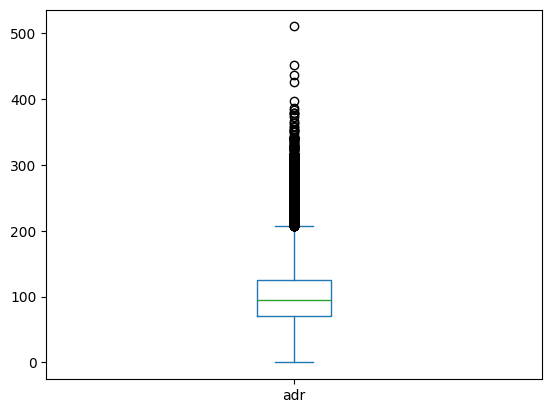

In [20]:
df['adr'].plot(kind='box')

In [21]:
df=df[df['adr']<5000]


# Data Analysis and Visualization

is_canceled
0    0.619655
1    0.380345
Name: proportion, dtype: float64


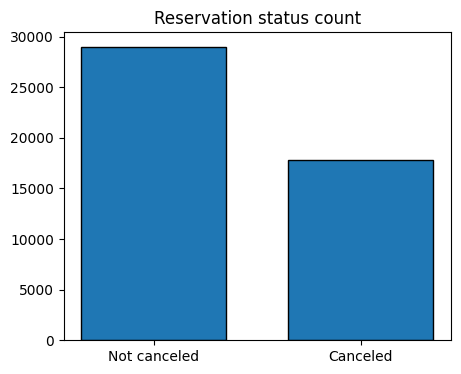

In [22]:
cancelled_percentage= df['is_canceled'].value_counts(normalize=True)
print(cancelled_percentage)

plt.figure(figsize=(5, 4))
plt.title('Reservation status count')
plt.bar(['Not canceled', 'Canceled'], df['is_canceled'].value_counts(), edgecolor='k', width=0.7)
plt.show()


# Calculate cancellation rates by hotel type

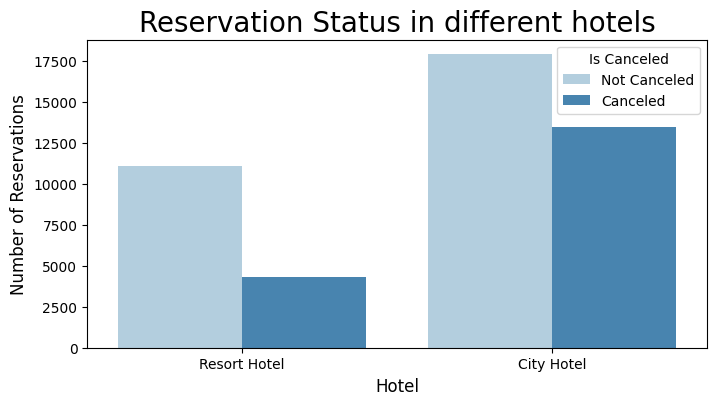

In [23]:

plt.figure(figsize=(8, 4))
ax1=sns.countplot(data=df, x='hotel', hue='is_canceled', palette='Blues')

legend_labels,_=ax1.get_legend_handles_labels()
# Add titles and labels
plt.title('Reservation Status in different hotels', size=20)
plt.xlabel('Hotel', size=12)
plt.ylabel('Number of Reservations', size=12)
plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'], loc='upper right')
plt.show()

# Hypothesis 1: Is there a significant difference in cancellation rates between Resort and City Hotels?
"""
Null Hypothesis (H0): There is no significant difference in cancellation rates.
Alternative Hypothesis (H1): There is a significant difference in cancellation rates.

In [24]:
resort_hotel=df[df['hotel']== 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize= True)

is_canceled
0    0.720195
1    0.279805
Name: proportion, dtype: float64

In [25]:
city_hotel=df[df['hotel']== 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize= True)

is_canceled
0    0.570428
1    0.429572
Name: proportion, dtype: float64

# Perform t-test

In [27]:
resort_cancellations = df[df['hotel'] == 'Resort Hotel']['is_canceled']
city_cancellations = df[df['hotel'] == 'City Hotel']['is_canceled']

t_stat, p_value = ttest_ind(resort_cancellations, city_cancellations)
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("We reject the null hypothesis: There is a significant difference in cancellation rates.")
else:
    print("We fail to reject the null hypothesis: No significant difference in cancellation rates.")

T-statistic: -31.6753, P-value: 0.0000
We reject the null hypothesis: There is a significant difference in cancellation rates.


# Hypothesis 2: Are cancellations associated with market segments?
"""
Null Hypothesis (H0): Cancellation is independent of market segment.
Alternative Hypothesis (H1): Cancellation is associated with market segment.
"""

In [28]:
market_segment_table = pd.crosstab(df['market_segment'], df['is_canceled'])
chi2, p_value, dof, expected = chi2_contingency(market_segment_table)
print(f"Chi-Square Statistic: {chi2:.4f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("We reject the null hypothesis: Cancellation is associated with market segment.")
else:
    print("We fail to reject the null hypothesis: Cancellation is independent of market segment.")

Chi-Square Statistic: 3683.8704, P-value: 0.0000
We reject the null hypothesis: Cancellation is associated with market segment.


# Hypothesis 3: Are there significant monthly trends in cancellations?

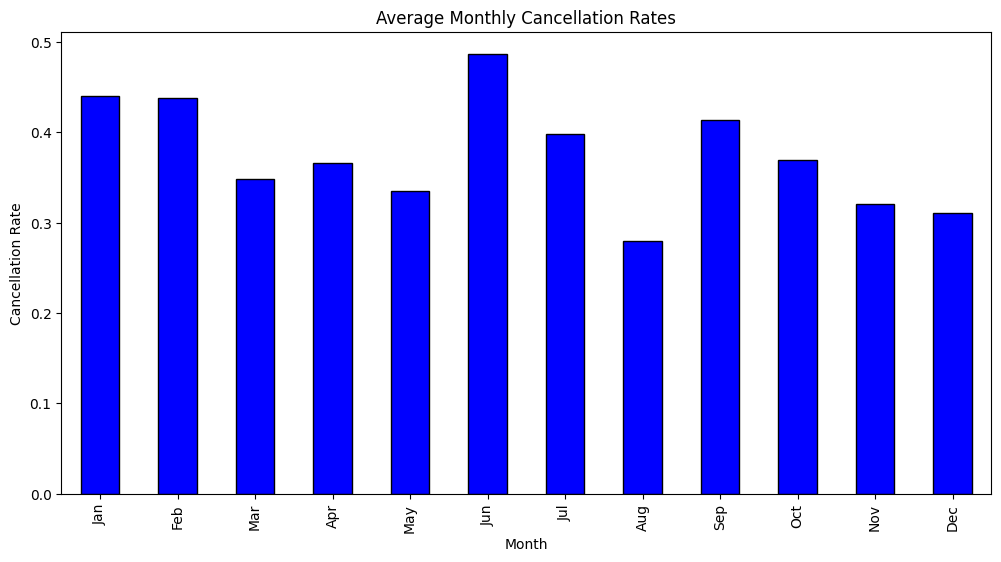

In [32]:
df['month'] = df['reservation_status_date'].dt.month
monthly_cancellations = df.groupby('month')['is_canceled'].mean()
plt.figure(figsize=(12, 6))
monthly_cancellations.plot(kind='bar', color='Blue', edgecolor='k')
plt.title('Average Monthly Cancellation Rates')
plt.xlabel('Month')
plt.ylabel('Cancellation Rate')
plt.xticks(ticks=range(12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# Correlation Analysis: Lead time and cancellation

In [58]:
# Fix the column name by removing the extra space
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()


In [33]:
corr = df[['lead_time', 'is_canceled']].corr().iloc[0, 1]
print(f"Correlation between lead time and cancellation: {corr:.4f}")

Correlation between lead time and cancellation: 0.3132


# Visualization

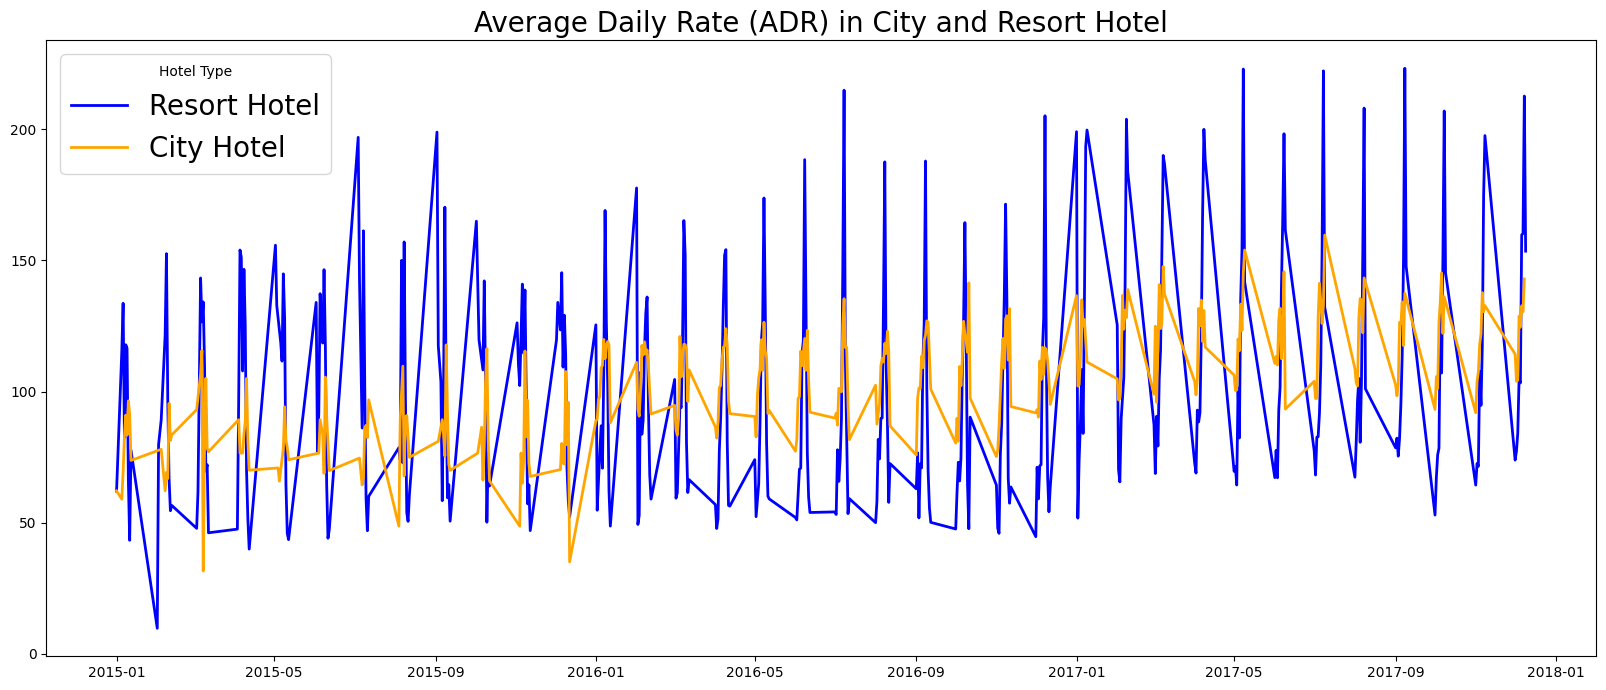

In [59]:
plt.figure(figsize=(20, 8))

# Plot ADR for resort hotel
plt.plot(resort_hotel.index, resort_hotel['adr'], label='Resort Hotel', color='blue', linewidth=2)

# Plot ADR for city hotel
plt.plot(city_hotel.index, city_hotel['adr'], label='City Hotel', color='orange', linewidth=2)

# Add titles and labels
plt.title('Average Daily Rate (ADR) in City and Resort Hotel', size=20)
plt.legend(title='Hotel Type', fontsize=20)
plt.show()

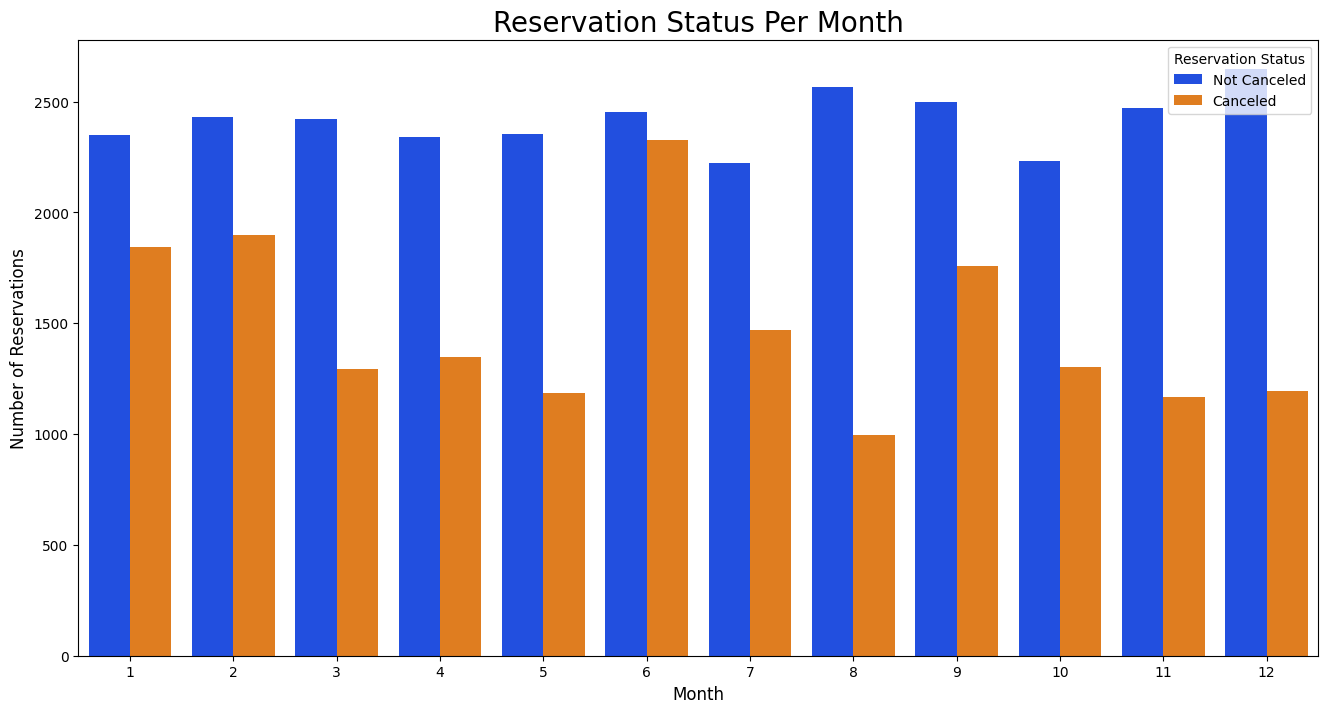

In [61]:
# Ensure the 'month' column is created from the datetime column
df['month'] = df['reservation_status_date'].dt.month

# Set the figure size
plt.figure(figsize=(16, 8))

# Create a countplot for reservations per month with hue for 'is_canceled'
ax1 = sns.countplot(x='month', hue='is_canceled', data=df, palette='bright')

# Add titles and labels
plt.title('Reservation Status Per Month', size=20)
plt.xlabel('Month', size=12)
plt.ylabel('Number of Reservations', size=12)

# Correctly configure the legend
plt.legend(title='Reservation Status', labels=['Not Canceled', 'Canceled'], loc='upper right')

# Show the plot
plt.show()


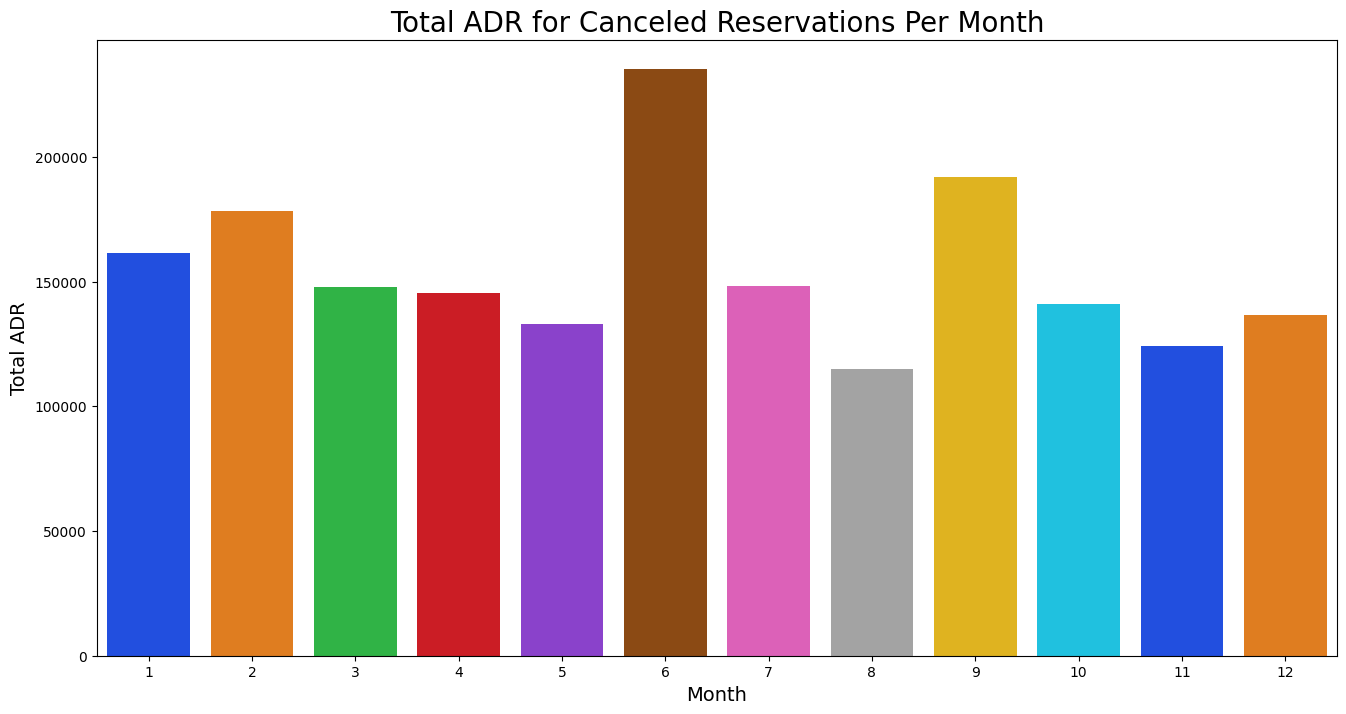

In [65]:
# Filter the data to include only canceled reservations
canceled_data = df[df['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index()

# Set the figure size
plt.figure(figsize=(16, 8))

# Create a barplot (not countplot) since you are working with aggregated data
sns.barplot(x='month', y='adr', data=canceled_data, palette='bright')

# Add titles and labels
plt.title('Total ADR for Canceled Reservations Per Month', size=20)
plt.xlabel('Month', size=14)
plt.ylabel('Total ADR', size=14)

# Show the plot
plt.show()


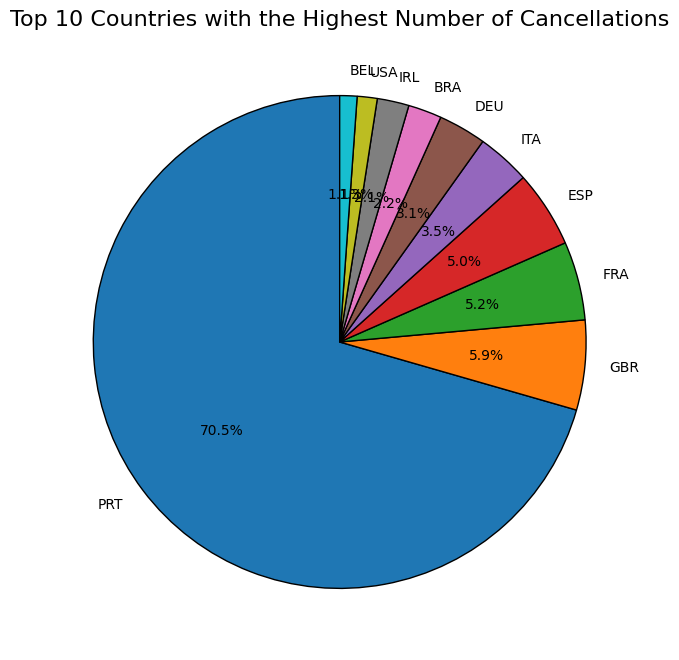

In [67]:


# Filter the dataset for canceled reservations
canceled_data = df[df['is_canceled'] == 1]

# Filter the data to include only canceled reservations
canceled_data = df[df['is_canceled'] == 1]

# Count cancellations by country
country_cancellations = canceled_data['country'].value_counts()

# Get the top 10 countries with the most cancellations
top_10_countries = country_cancellations.head(10)

# Create the pie chart
plt.figure(figsize=(10, 8))
top_10_countries.plot.pie(
    autopct='%1.1f%%', 
    startangle=90, 
    colors=plt.cm.tab10.colors, 
    labels=top_10_countries.index, 
    wedgeprops={'edgecolor': 'black'}
)

# Add title
plt.title('Top 10 Countries with the Highest Number of Cancellations', fontsize=16)

# Show the plot
plt.ylabel('')  # Remove the y-axis label for a cleaner look
plt.show()


In [68]:
df['market_segment'].value_counts()

market_segment
Online TA        22389
Offline TA/TO     9396
Groups            7738
Direct            4916
Corporate         1958
Complementary      291
Aviation            88
Name: count, dtype: int64

In [69]:
df['market_segment'].value_counts(normalize= True)

market_segment
Online TA        0.478643
Offline TA/TO    0.200872
Groups           0.165427
Direct           0.105097
Corporate        0.041859
Complementary    0.006221
Aviation         0.001881
Name: proportion, dtype: float64

In [70]:
canceled_data['market_segment'].value_counts(normalize= True)

market_segment
Online TA        0.462706
Groups           0.279973
Offline TA/TO    0.185824
Direct           0.041144
Corporate        0.026699
Complementary    0.001967
Aviation         0.001686
Name: proportion, dtype: float64

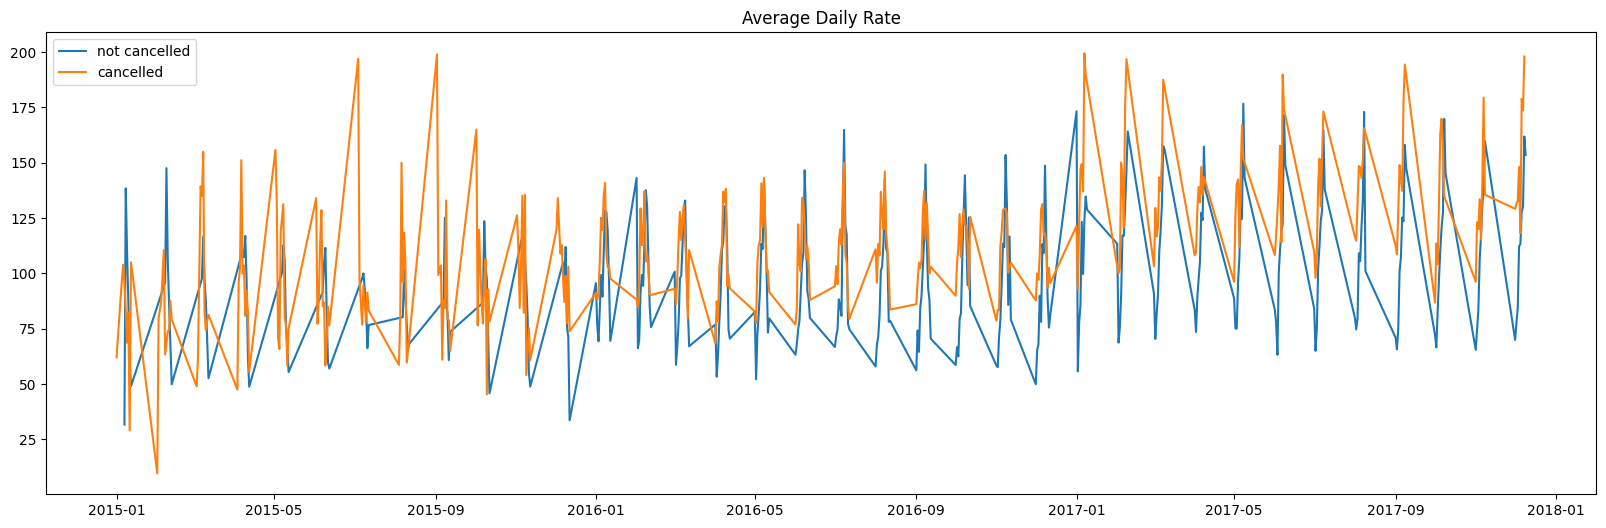

In [74]:
# Filter data for cancelled and not cancelled
cancelled_df = df[df['is_canceled'] == 1]  # Assuming 1 indicates cancellation
not_cancelled_df = df[df['is_canceled'] == 0]  # Assuming 0 indicates not cancelled

# Group by reservation status date and calculate mean adr
cancelled_df_adr = cancelled_df.groupby('reservation_status_date')[['adr']].mean()
cancelled_df_adr.reset_index(inplace=True)
cancelled_df_adr.sort_values('reservation_status_date', inplace=True)

not_cancelled_df_adr = not_cancelled_df.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_df_adr.reset_index(inplace=True)
not_cancelled_df_adr.sort_values('reservation_status_date', inplace=True)

# Plot the data
plt.figure(figsize=(20, 6))
plt.title('Average Daily Rate')
plt.plot(not_cancelled_df_adr['reservation_status_date'], not_cancelled_df_adr['adr'], label='not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'], cancelled_df_adr['adr'], label='cancelled')
plt.legend()
plt.show()

In [75]:
cancelled_df_adr = cancelled_df_adr[
    (cancelled_df_adr['reservation_status_date'] > '2016-01-01') &
    (cancelled_df_adr['reservation_status_date'] < '2017-09-01')
]

not_cancelled_df_adr = not_cancelled_df_adr[
    (not_cancelled_df_adr['reservation_status_date'] > '2016-01-01') &
    (not_cancelled_df_adr['reservation_status_date'] < '2017-09-01')
]

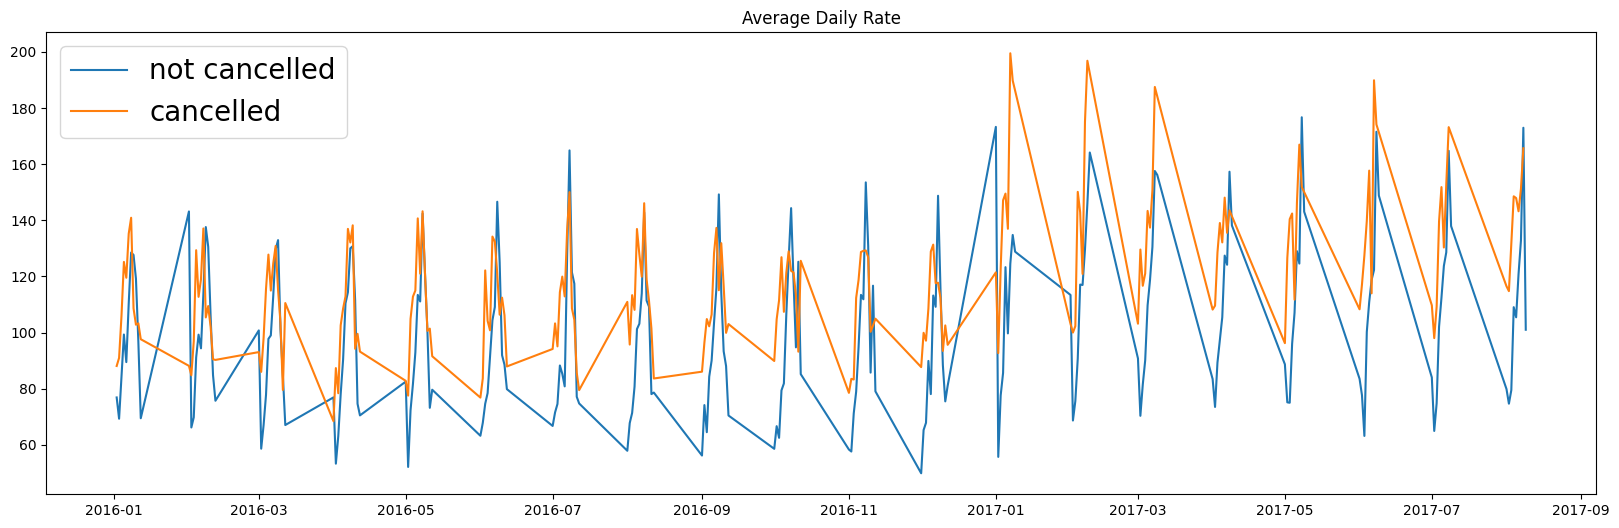

In [76]:
plt.figure(figsize=(20, 6))
plt.title('Average Daily Rate')

plt.plot(
    not_cancelled_df_adr['reservation_status_date'], 
    not_cancelled_df_adr['adr'], 
    label='not cancelled'
)
plt.plot(
    cancelled_df_adr['reservation_status_date'], 
    cancelled_df_adr['adr'], 
    label='cancelled'
)

plt.legend(fontsize=20)
plt.show()



# Conclusions
"""
1. City Hotels have a higher cancellation rate compared to Resort Hotels.
2. Cancellation is significantly associated with market segments.
3. Monthly trends indicate higher cancellations during specific periods (e.g., summer).
4. There is a moderate positive correlation between lead time and cancellation, suggesting longer lead times may lead to higher cancellation rates.